In [1]:
from google.colab import drive
from google.colab import files
upload = files.upload()

Saving dataset_project.csv to dataset_project.csv


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("dataset_project.csv")
dataset.head()

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13


In [26]:
# deciding cutoff for productivity for low and high
def new_type(row):
  if(row['productivity'])>=85:
    val = "high"
  elif (row['productivity'])<70:
    val = "low"
  else:
    val = "medium"
  return val


In [27]:
dataset['productivity_type']= dataset.apply(new_type, axis=1)
dataset.head()

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,medium,0.0
4,1954,74,5294,71.54,985.1,24.13,medium,0.0


In [28]:
# Assigning target value repective to productivity type 
dataset.loc[dataset['productivity_type'] == 'high', 'Target'] = 2
dataset.loc[dataset['productivity_type'] == 'medium', 'Target'] = 1
dataset.loc[dataset['productivity_type'] == 'low', 'Target'] = 0
dataset

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,medium,1.0
4,1954,74,5294,71.54,985.1,24.13,medium,1.0
...,...,...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82,medium,1.0
64,2014,1048,81870,78.12,838.0,24.73,medium,1.0
65,2015,987,75087,76.08,644.5,24.91,medium,1.0
66,2016,633,52262,82.56,906.3,26.45,medium,1.0


In [29]:
# Dropping dropping Target column and productivity
x = dataset.drop(["productivity_type","Target"],axis = "columns")

y = dataset.Target

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0)

In [59]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
model.score(X_test,y_test)

0.9950708333333332

In [72]:
y_pred = model.predict(X_test)
y_pred

array([2.  , 2.  , 2.  , 1.  , 2.  , 1.  , 2.  , 1.13, 1.  , 1.  , 2.  ,
       1.  , 1.  , 1.  ])

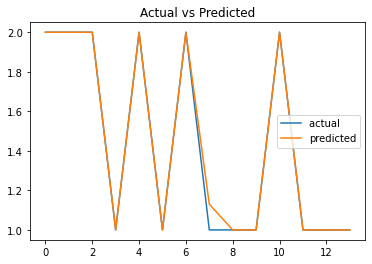

In [71]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()
